In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

from mtcnn.mtcnn import MTCNN # TODO: what is this?

In [4]:
train = pd.read_csv('compiled_labels_km-annotated.csv')

display(train)

,name,x1,x2,y1,y2,classname,image_file_dir
0,1801.jpg,451,186,444,511,face_no_mask,../Dataset/mask_image_data/images/
1,1802.jpg,160,151,108,114,face_mask,../Dataset/mask_image_data/images/
2,1802.jpg,110,71,163,201,face_with_mask,../Dataset/mask_image_data/images/
3,1803.jpg,147,200,141,120,face_mask,../Dataset/mask_image_data/images/
4,1803.jpg,126,75,177,258,face_with_mask,../Dataset/mask_image_data/images/
...,...,...,...,...,...,...,...
20312,new_76.jpg,191,187,282,382,face_no_mask,../Dataset/yolo/images/valid/
20313,new_78.jpg,126,200,335,370,face_no_mask,../Dataset/yolo/images/valid/
20314,new_79.jpg,138,212,305,332,face_no_mask,../Dataset/yolo/images/valid/
20315,new_90.jpg,133,263,346,316,face_no_mask,../Dataset/yolo/images/valid/


In [6]:
train = train.reset_index()
# only keep faces without masks
train= train[train['image_file_dir'] == '../Dataset/mask_image_data/images/']
display(train)

,index,name,x1,x2,y1,y2,classname,image_file_dir
0,0,1801.jpg,451,186,444,511,face_no_mask,../Dataset/mask_image_data/images/
1,1,1802.jpg,160,151,108,114,face_mask,../Dataset/mask_image_data/images/
2,2,1802.jpg,110,71,163,201,face_with_mask,../Dataset/mask_image_data/images/
3,3,1803.jpg,147,200,141,120,face_mask,../Dataset/mask_image_data/images/
4,4,1803.jpg,126,75,177,258,face_with_mask,../Dataset/mask_image_data/images/
...,...,...,...,...,...,...,...,...
11572,11572,6433.png,669,205,105,77,face_mask,../Dataset/mask_image_data/images/
11573,11573,6434.jpg,315,82,460,701,face_with_mask,../Dataset/mask_image_data/images/
11574,11574,6434.jpg,343,448,413,326,face_mask,../Dataset/mask_image_data/images/
11575,11575,6435.jpg,198,86,94,63,face_mask,../Dataset/mask_image_data/images/


1861.jpg cannot be formatted


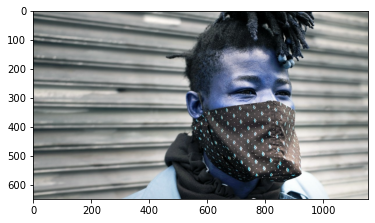

In [7]:
# Extracts images and places the information into a list (data) of 50x50 pixel images
img_size=224#50
data_unmasked=[]
to_drop = []
    
for index,row in train.iterrows(): # only extract face annotation (NOT mask annotations)
    # reads in the image and converts it to greyscale 
    img_array=cv2.imread(row['image_file_dir']+row['name'],cv2.COLOR_BGR2RGB)#IMREAD_GRAYSCALE)#
    # crops the image to only include the face 
    crop_image = img_array[row['x2']:(row['y2']+row['x2']),
                           row['x1']:(row['y1']+row['x1'])]
    # resizes the image to 50x50
    try:
        new_img_array=cv2.resize(crop_image,(img_size,img_size))
    #         plt.imshow(new_img_array)
    #         plt.show()
        data_unmasked.append([new_img_array,row['classname']])#new_img_array[1]])
    except:
        print(row['name'],"cannot be formatted")
        plt.imshow(img_array)
        plt.show()
        # keep track of those without the appropriate information and drop from the dataframe
        to_drop.append(index)
        data_unmasked.append(-1)
    






In [8]:
# Exclude annotations that could not be formatted
train_unmasked = train_unmasked.drop(to_drop)

initial_len = len(data_unmasked)
data_unmasked = [x for x in data_unmasked if x != -1]

print("Dropped",len(to_drop),"images from train_unmasked")
print("Dropped",initial_len-len(data_unmasked),"faces from data")




Dropped 1 images from train_unmasked
Dropped 1 faces from data


# Plot faces

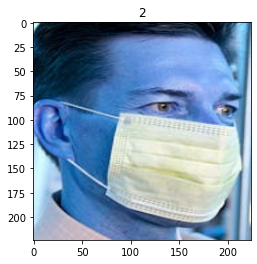

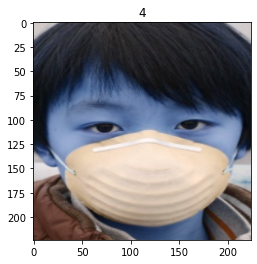

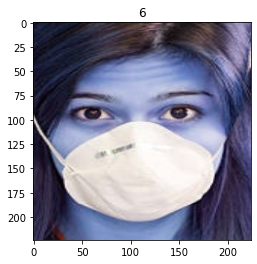

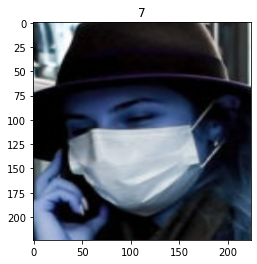

In [15]:
# show a few extracted faces:
for i in range(1,10):
#     print(data_unmasked[i][0])
#     print("Shape:",data_unmasked[i][0].shape)
    if(data_unmasked[i][1]!="face_mask"):
        plt.imshow(data_unmasked[i][0])
        plt.title(i)
        plt.show()



In [17]:
train= train[train["classname"] != 'face_mask']

In [18]:
train

,index,name,x1,x2,y1,y2,classname,image_file_dir
0,0,1801.jpg,451,186,444,511,face_no_mask,../Dataset/mask_image_data/images/
2,2,1802.jpg,110,71,163,201,face_with_mask,../Dataset/mask_image_data/images/
4,4,1803.jpg,126,75,177,258,face_with_mask,../Dataset/mask_image_data/images/
6,6,1804.jpg,112,113,150,194,face_with_mask,../Dataset/mask_image_data/images/
7,7,1805.jpg,728,180,125,156,face_with_mask,../Dataset/mask_image_data/images/
...,...,...,...,...,...,...,...,...
11565,11565,6433.png,765,142,211,222,face_with_mask,../Dataset/mask_image_data/images/
11566,11566,6433.png,146,107,158,206,face_with_mask,../Dataset/mask_image_data/images/
11567,11567,6433.png,328,39,216,312,face_with_mask,../Dataset/mask_image_data/images/
11573,11573,6434.jpg,315,82,460,701,face_with_mask,../Dataset/mask_image_data/images/


In [52]:
len(train)

7271